# Input Libraries

In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.0.3
matplotlib version: 3.7.2
NumPy version: 1.24.3
SciPy version: 1.11.1
IPython version: 8.15.0
scikit-learn version: 1.3.0
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

# Data Preprocessing

In [3]:
dataset = pd.read_csv('UK_Student_Expenses.csv')
dataset.head()

,Name,Age,Gender,Level_of_Education,Monthly_Income,Student_Accommodation,Utilities,Grocery_shopping,Takeaways/dining,Public Transportation,Vehicle Maintenance,Tuition Fees,Books_and_Supplies,Online_Courses/Subscriptions,Clothing,Entertainment,Health/Medical Expenses,Memberships,Mobile/broadband_Bills,Total Monthly Expense
0,Marvin Wilson,22,Male,Post graduate,636,738,56,137,36,109,39,4535,31,44,120,134,181,52,55,6267
1,Henry Rogers,27,Male,Post graduate,968,605,54,131,66,170,24,1795,116,10,87,133,76,69,24,3360
2,Samuel Ramos,24,Male,Undergraduate,1138,502,62,154,95,165,34,3372,65,97,120,157,93,25,28,4969
3,Bryan Meyer,25,Male,Graduate,1087,685,58,178,70,187,86,1551,78,62,146,168,178,93,55,3595
4,Daniel Craig,18,Male,Diploma,585,631,69,92,41,162,84,4379,38,34,112,120,152,14,69,5997


In [5]:
dataset['Accomodation'] = dataset['Student_Accommodation'] + dataset['Utilities']
dataset['Food'] = dataset['Grocery_shopping'] + dataset['Takeaways/dining']
dataset['Transportation'] = dataset['Public Transportation'] + dataset['Vehicle Maintenance']
dataset['Academic_costs'] = dataset['Books_and_Supplies'] + dataset['Online_Courses/Subscriptions']
dataset['Personal_Expenses'] = dataset['Clothing'] + dataset['Entertainment'] + dataset['Memberships'] + dataset['Mobile/broadband_Bills']
dataset['Medical_Expenses'] = dataset['Health/Medical Expenses']

In [6]:
drop_columns = ['Student_Accommodation', 'Utilities', 'Grocery_shopping', 'Takeaways/dining', 'Public Transportation', 'Vehicle Maintenance', 'Books_and_Supplies', 'Online_Courses/Subscriptions', 'Clothing', 'Entertainment', 'Memberships', 'Mobile/broadband_Bills', 'Health/Medical Expenses']
dataset.drop(drop_columns, axis=1, inplace = True)

In [7]:
dataset

,Name,Age,Gender,Level_of_Education,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses
0,Marvin Wilson,22,Male,Post graduate,636,4535,6267,794,173,148,75,361,181
1,Henry Rogers,27,Male,Post graduate,968,1795,3360,659,197,194,126,313,76
2,Samuel Ramos,24,Male,Undergraduate,1138,3372,4969,564,249,199,162,330,93
3,Bryan Meyer,25,Male,Graduate,1087,1551,3595,743,248,273,140,462,178
4,Daniel Craig,18,Male,Diploma,585,4379,5997,700,133,246,72,315,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Justin Walker,28,Male,Post graduate,980,4148,5572,638,123,214,95,250,104
206,Deanna Huber,26,Female,Post graduate,806,3840,5543,643,166,249,111,481,53
207,Kenneth Tyler,25,Male,Post graduate,1031,2901,4404,600,151,243,113,341,55
208,Douglas Davis,24,Male,Graduate,1103,2022,3484,624,150,154,34,333,167


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   210 non-null    object
 1   Age                    210 non-null    int64 
 2   Gender                 210 non-null    object
 3   Level_of_Education     210 non-null    object
 4   Monthly_Income         210 non-null    int64 
 5   Tuition Fees           210 non-null    int64 
 6   Total Monthly Expense  210 non-null    int64 
 7   Accomodation           210 non-null    int64 
 8   Food                   210 non-null    int64 
 9   Transportation         210 non-null    int64 
 10  Academic_costs         210 non-null    int64 
 11  Personal_Expenses      210 non-null    int64 
 12  Medical_Expenses       210 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 21.5+ KB


In [9]:
dataset.isnull().sum()

Name                     0
Age                      0
Gender                   0
Level_of_Education       0
Monthly_Income           0
Tuition Fees             0
Total Monthly Expense    0
Accomodation             0
Food                     0
Transportation           0
Academic_costs           0
Personal_Expenses        0
Medical_Expenses         0
dtype: int64

In [10]:
dataset.describe()

,Age,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,23.404762,908.919048,3137.319048,4787.490476,704.723810,185.000000,208.623810,124.271429,305.290476,105.642857
std,3.587988,212.547834,1160.545474,1208.479567,93.673463,47.958615,35.371121,39.897448,62.373519,51.785914
min,16.000000,503.000000,1002.000000,2466.000000,490.000000,74.000000,128.000000,33.000000,141.000000,20.000000
25%,20.000000,750.750000,2150.500000,3776.750000,622.500000,151.000000,181.000000,98.000000,261.000000,63.250000
50%,24.000000,911.000000,3167.500000,4758.000000,697.500000,186.000000,210.000000,124.500000,301.500000,104.500000
75%,27.000000,1084.500000,4147.750000,5879.750000,794.750000,219.000000,232.750000,156.250000,350.750000,151.000000
max,29.000000,1292.000000,5578.000000,7600.000000,864.000000,286.000000,282.000000,209.000000,481.000000,198.000000


In [11]:
dataset.columns

Index(['Name', 'Age', 'Gender', 'Level_of_Education', 'Monthly_Income',
       'Tuition Fees', 'Total Monthly Expense', 'Accomodation', 'Food',
       'Transportation', 'Academic_costs', 'Personal_Expenses',
       'Medical_Expenses'],
      dtype='object')

In [12]:
dataset['Gender'].unique()
#dataset['Level_of_Education'].unique()

array(['Male', 'Female', 'male'], dtype=object)

In [13]:
dataset['Gender'] = dataset['Gender'].str.title()

In [14]:
dataset.head()

,Name,Age,Gender,Level_of_Education,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses
0,Marvin Wilson,22,Male,Post graduate,636,4535,6267,794,173,148,75,361,181
1,Henry Rogers,27,Male,Post graduate,968,1795,3360,659,197,194,126,313,76
2,Samuel Ramos,24,Male,Undergraduate,1138,3372,4969,564,249,199,162,330,93
3,Bryan Meyer,25,Male,Graduate,1087,1551,3595,743,248,273,140,462,178
4,Daniel Craig,18,Male,Diploma,585,4379,5997,700,133,246,72,315,152


In [15]:
data2 = dataset.copy()
data2.head()

,Name,Age,Gender,Level_of_Education,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses
0,Marvin Wilson,22,Male,Post graduate,636,4535,6267,794,173,148,75,361,181
1,Henry Rogers,27,Male,Post graduate,968,1795,3360,659,197,194,126,313,76
2,Samuel Ramos,24,Male,Undergraduate,1138,3372,4969,564,249,199,162,330,93
3,Bryan Meyer,25,Male,Graduate,1087,1551,3595,743,248,273,140,462,178
4,Daniel Craig,18,Male,Diploma,585,4379,5997,700,133,246,72,315,152


In [16]:
data = data2.copy()

data = data.drop(['Name', 'Gender', 'Level_of_Education'], axis=1)
data.head()

,Age,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses
0,22,636,4535,6267,794,173,148,75,361,181
1,27,968,1795,3360,659,197,194,126,313,76
2,24,1138,3372,4969,564,249,199,162,330,93
3,25,1087,1551,3595,743,248,273,140,462,178
4,18,585,4379,5997,700,133,246,72,315,152


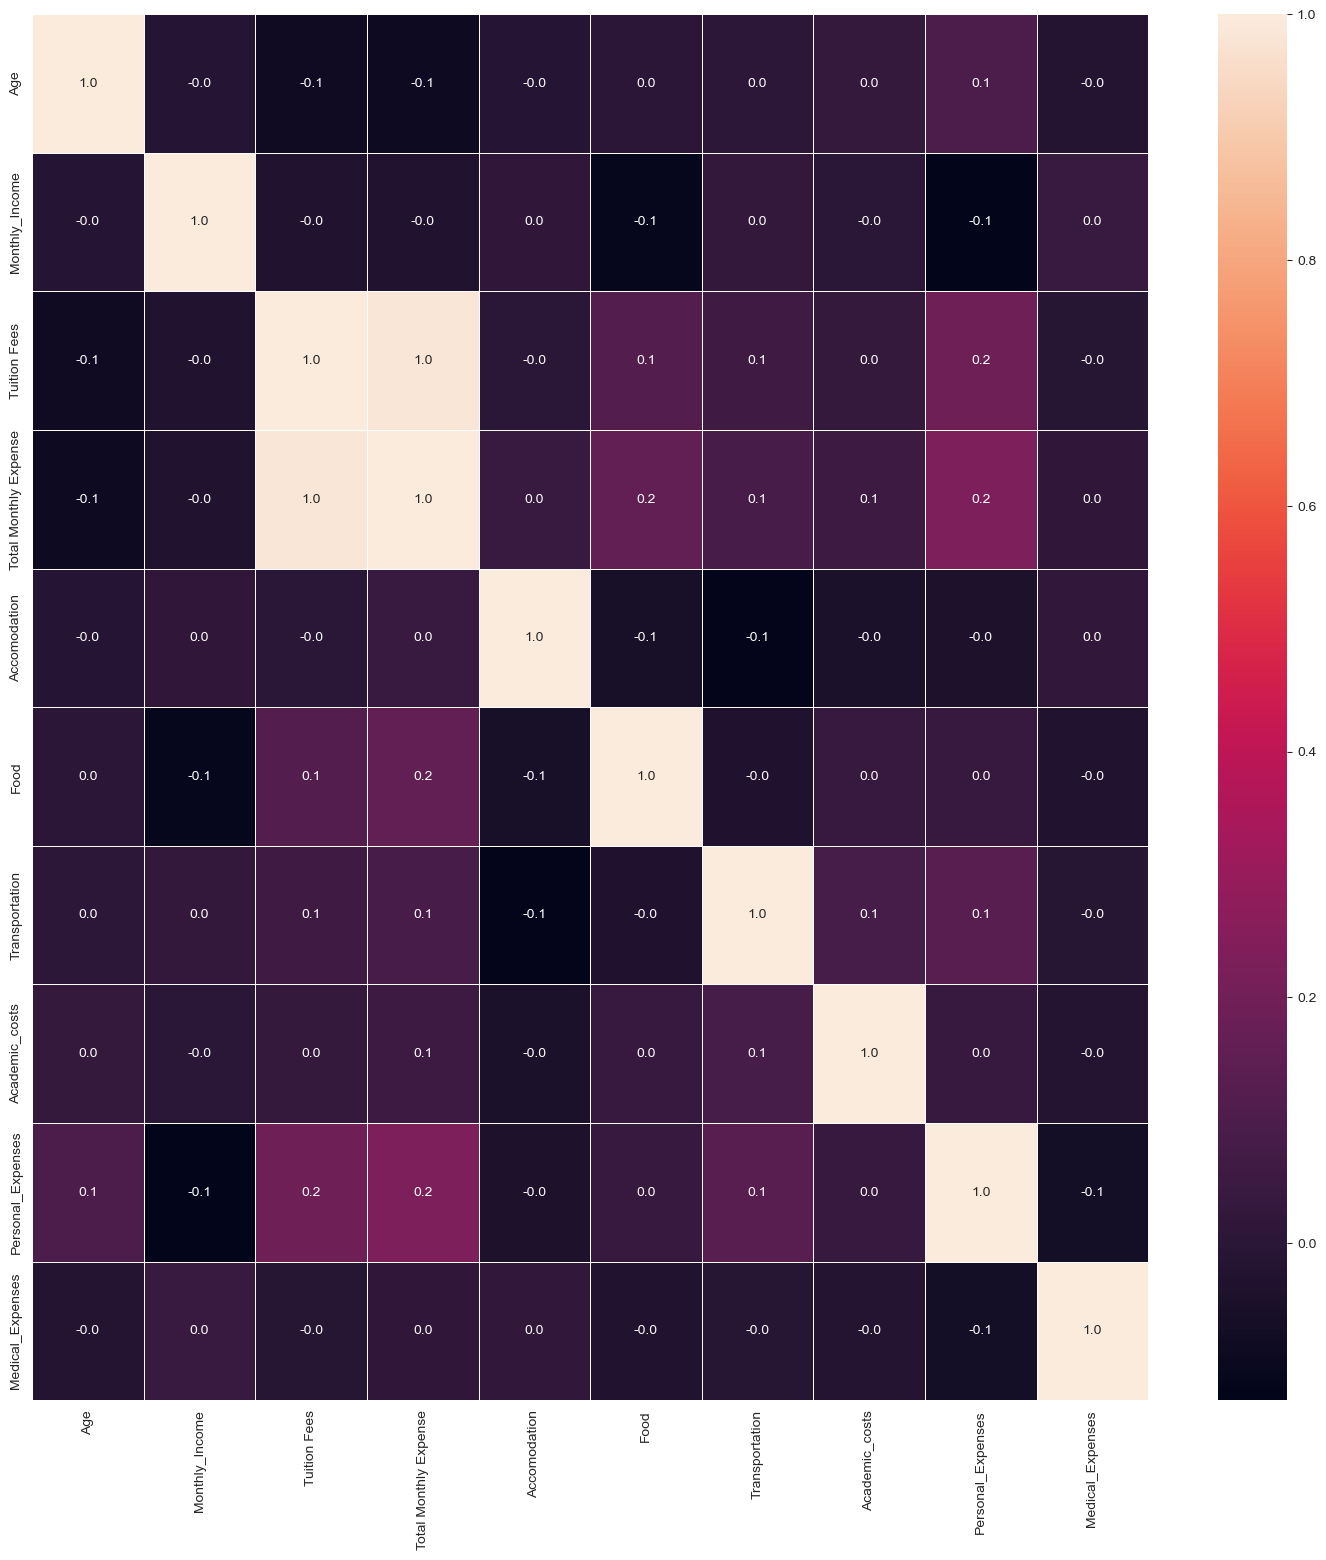

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Text(0.5, 1.0, 'Age v/s Total Monthly Expense Scatter Plot')

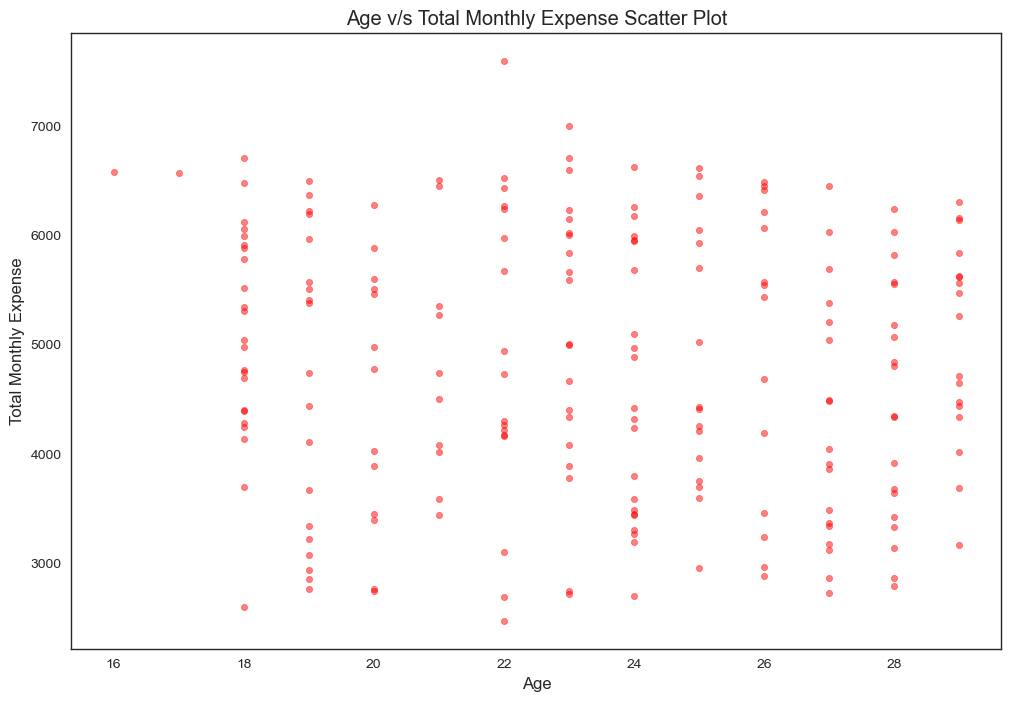

In [18]:
# Scatter Plot 
# x = age, y = total monthly expense
data.plot(kind='scatter', x='Age', y='Total Monthly Expense',alpha = 0.5,color = 'red')
plt.xlabel('Age')              # label = name of label
plt.ylabel('Total Monthly Expense')
plt.title('Age v/s Total Monthly Expense Scatter Plot') 

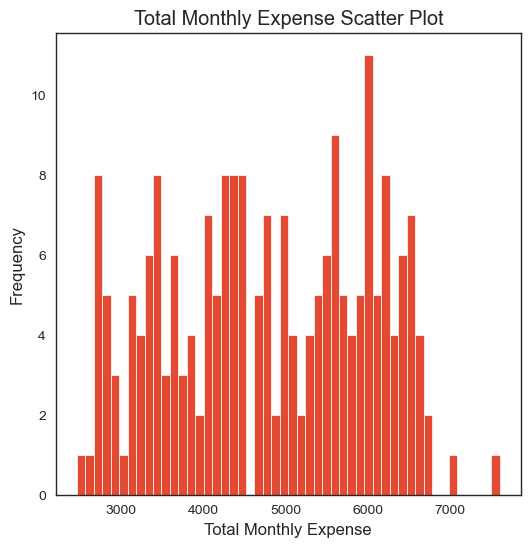

In [21]:
# Histogram
# bins = number of bar in figure
data['Total Monthly Expense'].plot(kind = 'hist',bins = 50,figsize = (6,6))
plt.xlabel('Total Monthly Expense')              
plt.title('Total Monthly Expense Scatter Plot') 
plt.show()

# Modeling

In [22]:
dataset.head()

,Name,Age,Gender,Level_of_Education,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses
0,Marvin Wilson,22,Male,Post graduate,636,4535,6267,794,173,148,75,361,181
1,Henry Rogers,27,Male,Post graduate,968,1795,3360,659,197,194,126,313,76
2,Samuel Ramos,24,Male,Undergraduate,1138,3372,4969,564,249,199,162,330,93
3,Bryan Meyer,25,Male,Graduate,1087,1551,3595,743,248,273,140,462,178
4,Daniel Craig,18,Male,Diploma,585,4379,5997,700,133,246,72,315,152


In [23]:
label = LabelEncoder()
data2['Gender_Code'] = label.fit_transform(data2['Gender'])

In [24]:
data2['Education_Level'] = label.fit_transform(data2['Level_of_Education'])

In [25]:
data2 = data2.drop(['Gender', 'Level_of_Education'], axis=1)
data2.head()

,Name,Age,Monthly_Income,Tuition Fees,Total Monthly Expense,Accomodation,Food,Transportation,Academic_costs,Personal_Expenses,Medical_Expenses,Gender_Code,Education_Level
0,Marvin Wilson,22,636,4535,6267,794,173,148,75,361,181,1,2
1,Henry Rogers,27,968,1795,3360,659,197,194,126,313,76,1,2
2,Samuel Ramos,24,1138,3372,4969,564,249,199,162,330,93,1,3
3,Bryan Meyer,25,1087,1551,3595,743,248,273,140,462,178,1,1
4,Daniel Craig,18,585,4379,5997,700,133,246,72,315,152,1,0


In [26]:
data2.columns

Index(['Name', 'Age', 'Monthly_Income', 'Tuition Fees',
       'Total Monthly Expense', 'Accomodation', 'Food', 'Transportation',
       'Academic_costs', 'Personal_Expenses', 'Medical_Expenses',
       'Gender_Code', 'Education_Level'],
      dtype='object')

In [27]:
x = data2.loc[:,['Age', 'Gender_Code', 'Education_Level', 'Monthly_Income', 'Tuition Fees']].values
y = data2.iloc[:,4:11].values

In [28]:
print(x)
print(y)

[[  22    1    2  636 4535]
 [  27    1    2  968 1795]
 [  24    1    3 1138 3372]
 ...
 [  25    1    2 1031 2901]
 [  24    1    1 1103 2022]
 [  24    1    1  771 4147]]
[[6267  794  173 ...   75  361  181]
 [3360  659  197 ...  126  313   76]
 [4969  564  249 ...  162  330   93]
 ...
 [4404  600  151 ...  113  341   55]
 [3484  624  150 ...   34  333  167]
 [5949  740  159 ...  147  424  130]]


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [30]:
print(x_train)

[[  23    1    1  860 4728]
 [  25    0    3  660 2300]
 [  29    0    3 1066 1859]
 [  19    0    3 1035 3691]
 [  27    0    2  845 4261]
 [  16    0    1  967 4754]
 [  20    0    3  515 4109]
 [  18    1    1  749 2596]
 [  28    1    3 1219 1736]
 [  19    0    1 1062 3797]
 [  22    0    3  853 4071]
 [  19    1    1  581 4343]
 [  28    1    1  849 3131]
 [  18    0    1  691 2908]
 [  25    1    3  906 1317]
 [  22    0    2  840 5578]
 [  29    1    2  762 3351]
 [  26    1    1  956 2965]
 [  23    0    0 1142 3167]
 [  19    0    0  628 1043]
 [  25    0    2  503 2358]
 [  23    0    1 1116 3338]
 [  20    0    3 1118 4022]
 [  19    0    0  900 4680]
 [  19    1    0  551 1398]
 [  24    1    1 1103 2022]
 [  19    0    1  884 4509]
 [  29    0    1  853 1750]
 [  20    0    3  833 1078]
 [  28    0    1  759 2430]
 [  25    1    1 1263 4228]
 [  18    1    1  974 2993]
 [  20    0    3  985 2351]
 [  26    0    2  965 1677]
 [  28    0    2  797 2754]
 [  18    1    1  88

In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
x_test

array([[  19,    0,    0, 1221, 2835],
       [  19,    0,    0, 1038, 3237],
       [  24,    1,    2,  787, 4249],
       [  23,    1,    2,  894, 4988],
       [  22,    1,    1,  867, 4800],
       [  19,    0,    1,  720, 1973],
       [  25,    0,    3, 1073, 2454],
       [  22,    0,    1, 1089, 2833],
       [  28,    1,    2,  980, 4148],
       [  26,    0,    2,  733, 4663],
       [  24,    0,    1,  749, 2611],
       [  18,    1,    0,  585, 4379],
       [  23,    0,    3,  531, 2086],
       [  28,    1,    3,  647, 4017],
       [  29,    1,    1,  767, 2963],
       [  23,    0,    1, 1127, 1015],
       [  23,    1,    2,  873, 2479],
       [  27,    1,    2,  928, 1709],
       [  18,    1,    1,  757, 3372],
       [  22,    1,    1, 1106, 2539],
       [  25,    1,    1,  934, 2755],
       [  27,    0,    1,  719, 4143],
       [  25,    1,    2, 1096, 4818],
       [  26,    1,    2, 1210, 3922],
       [  28,    1,    3, 1108, 4179],
       [  18,    0,    1,

In [31]:
y_pred = regressor.predict(x_test)

In [32]:
print(y_pred)

[[4481.  815.  186.  197.  118.  272.   68.]
 [4882.  617.  222.  195.  117.  317.   83.]
 [5783.  707.  152.  216.  146.  374.   42.]
 [6485.  682.  199.  234.  118.  454.   26.]
 [6526.  642.   97.  263.  130.  223.  196.]
 [3432.  569.  174.  229.   47.  339.  159.]
 [4238.  831.  206.  232.  158.  255.  118.]
 [4645.  813.  113.  191.  166.  252.   37.]
 [6000.  490.  160.  233.  136.  380.   86.]
 [6156.  607.  219.  228.   33.  335.   67.]
 [4249.  789.  190.  143.  111.  284.  119.]
 [5961.  569.  227.  254.  177.  259.  132.]
 [4040.  820.  218.  188.  117.  414.  195.]
 [7000.  550.  196.  223.   90.  302.   30.]
 [4749.  822.  280.  227.   74.  347.   48.]
 [2466.  579.  187.  190.   83.  270.  155.]
 [4236.  790.  222.  244.  121.  343.   20.]
 [3234.  632.  252.  209.  106.  177.  181.]
 [4939.  616.  235.  213.  107.  327.  111.]
 [4158.  679.  196.  163.  104.  296.  198.]
 [4170.  801.  119.  178.   74.  273.  106.]
 [5974.  850.  233.  227.  113.  277.  197.]
 [6485.  6

In [33]:
print(y_test)

[[4431  751  100  181  153  272  139]
 [4740  614  139  219  118  227  186]
 [6172  806  246  177  131  386  177]
 [6595  735  286  152  110  224  100]
 [6437  700  183  244   98  300  112]
 [3664  719  160  281  141  323   67]
 [4201  718  206  211  205  313   94]
 [4296  670  144  151   60  301  137]
 [5572  638  123  214   95  250  104]
 [6453  840  262  183  167  230  108]
 [4314  769  118  195  170  328  123]
 [5997  700  133  246   72  315  152]
 [3771  754  157  168  116  334  156]
 [5549  851  111  209   76  229   56]
 [4474  695  218  207   83  283   25]
 [2742  841  158  223  125  226  154]
 [4075  734  197  262   74  224  105]
 [3111  599  227  235  113  206   22]
 [5044  783  150  214  165  233  127]
 [4216  701  247  179  103  376   71]
 [4427  713  123  258   78  334  166]
 [6031  843  174  178  169  422  102]
 [6542  795  164  232  159  250  124]
 [5573  579  175  256  108  432   83]
 [5821  670  179  211   88  431   63]
 [6118  625  152  180  193  225  108]
 [6227  849 

In [31]:
df1 = pd.DataFrame(y_test, columns=['Total Monthly Expense', 'Accomodation', 'Food', 'Transportation',
       'Academic_costs', 'Personal_Expenses', 'Medical_Expenses'])
df2 = pd.DataFrame(y_pred, columns=['Total Monthly Expense', 'Accomodation', 'Food', 'Transportation',
       'Academic_costs', 'Personal_Expenses', 'Medical_Expenses'])

NameError: name 'y_pred' is not defined

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Total Monthly Expense  42 non-null     int64
 1   Accomodation           42 non-null     int64
 2   Food                   42 non-null     int64
 3   Transportation         42 non-null     int64
 4   Academic_costs         42 non-null     int64
 5   Personal_Expenses      42 non-null     int64
 6   Medical_Expenses       42 non-null     int64
dtypes: int64(7)
memory usage: 2.4 KB


In [33]:
# evaluate multioutput regression model with k-fold cross-validation
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 86.943 (8.310)


In [43]:
y_test[:,:1]

array([[4431],
       [4740],
       [6172],
       [6595],
       [6437],
       [3664],
       [4201],
       [4296],
       [5572],
       [6453],
       [4314],
       [5997],
       [3771],
       [5549],
       [4474],
       [2742],
       [4075],
       [3111],
       [5044],
       [4216],
       [4427],
       [6031],
       [6542],
       [5573],
       [5821],
       [6118],
       [6227],
       [3689],
       [4075],
       [4187],
       [4105],
       [5678],
       [3745],
       [6024],
       [5273],
       [3325],
       [2691],
       [4263],
       [6053],
       [3584],
       [3389],
       [5949]], dtype=int64)

In [40]:
y_pred

array([[4481.,  815.,  186.,  197.,  118.,  272.,   68.],
       [4996.,  718.,  132.,  273.,  159.,  344.,   32.],
       [7000.,  550.,  196.,  223.,   90.,  302.,   30.],
       [6485.,  682.,  199.,  234.,  118.,  454.,   26.],
       [6455.,  613.,  197.,  236.,  181.,  294.,  148.],
       [3432.,  628.,   99.,  224.,  139.,  351.,  147.],
       [4238.,  831.,  206.,  232.,  158.,  255.,  118.],
       [4725.,  832.,  246.,  186.,  159.,  302.,  175.],
       [6000.,  490.,  160.,  233.,  136.,  380.,   86.],
       [5000.,  680.,  205.,  191.,  183.,  286.,   43.],
       [4249.,  789.,  190.,  143.,  111.,  284.,  119.],
       [5961.,  569.,  227.,  254.,  177.,  259.,  132.],
       [3794.,  842.,  134.,  171.,  163.,  250.,  159.],
       [7000.,  550.,  196.,  223.,   90.,  302.,   30.],
       [4749.,  822.,  280.,  227.,   74.,  347.,   48.],
       [2466.,  579.,  187.,  190.,   83.,  270.,  155.],
       [4236.,  790.,  222.,  244.,  121.,  343.,   20.],
       [3234.,

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test[:,:1], y_pred[:,:1], squared = False))
rms

21.817738317362032

In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-0.7908535237875173


In [34]:
# fit model
model.fit(x_train,y_train)
# make a prediction
y_pred = model.predict(x_test)
# summarize prediction
print(y_pred)

[[4481.  815.  186.  197.  118.  272.   68.]
 [4996.  718.  132.  273.  159.  344.   32.]
 [7000.  550.  196.  223.   90.  302.   30.]
 [6485.  682.  199.  234.  118.  454.   26.]
 [6455.  613.  197.  236.  181.  294.  148.]
 [3432.  628.   99.  224.  139.  351.  147.]
 [4238.  831.  206.  232.  158.  255.  118.]
 [4725.  832.  246.  186.  159.  302.  175.]
 [6000.  490.  160.  233.  136.  380.   86.]
 [5000.  680.  205.  191.  183.  286.   43.]
 [4249.  789.  190.  143.  111.  284.  119.]
 [5961.  569.  227.  254.  177.  259.  132.]
 [3794.  842.  134.  171.  163.  250.  159.]
 [7000.  550.  196.  223.   90.  302.   30.]
 [4749.  822.  280.  227.   74.  347.   48.]
 [2466.  579.  187.  190.   83.  270.  155.]
 [4236.  790.  222.  244.  121.  343.   20.]
 [3234.  632.  252.  209.  106.  177.  181.]
 [4972.  583.  266.  265.   55.  381.  155.]
 [4158.  679.  196.  163.  104.  296.  198.]
 [4495.  793.  116.  240.  133.  253.  167.]
 [5974.  850.  233.  227.  113.  277.  197.]
 [6485.  6

## Model Pickle

In [32]:
import pickle

In [33]:
with open('recommender_system.pkl', 'wb') as file:
    pickle.dump(model, file)

# GridSearchCV

In [37]:
## importing class from library
from sklearn.model_selection import GridSearchCV

## Setting optimum values for parameters.
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

## fitting data 
# grid_search.fit(x, y)

grid_search.fit(x_train, y_train)

## getting best parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [67]:
from sklearn.ensemble import RandomForestRegressor

model_2 = RandomForestRegressor(n_estimators = 10, random_state=0)
# regressor.fit(x_train,y_train)

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=4)
# evaluate the model and collect the scores
n_scores = cross_val_score(model_2, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 71.158 (4.589)
